In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
np.random.seed(200)

In [2]:
def plot_ellipses_gmm(means, covariances,ax):
    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):
        
        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none')
        ax.add_artist(ell)


In [3]:
def plot_scatter(datas, ax):
    color_list=['r','g','b','k']
    ax.axis('equal')    
    for i,data in enumerate(datas):
        ax.scatter(data[:,0],data[:,1], c=color_list[i], marker='o')


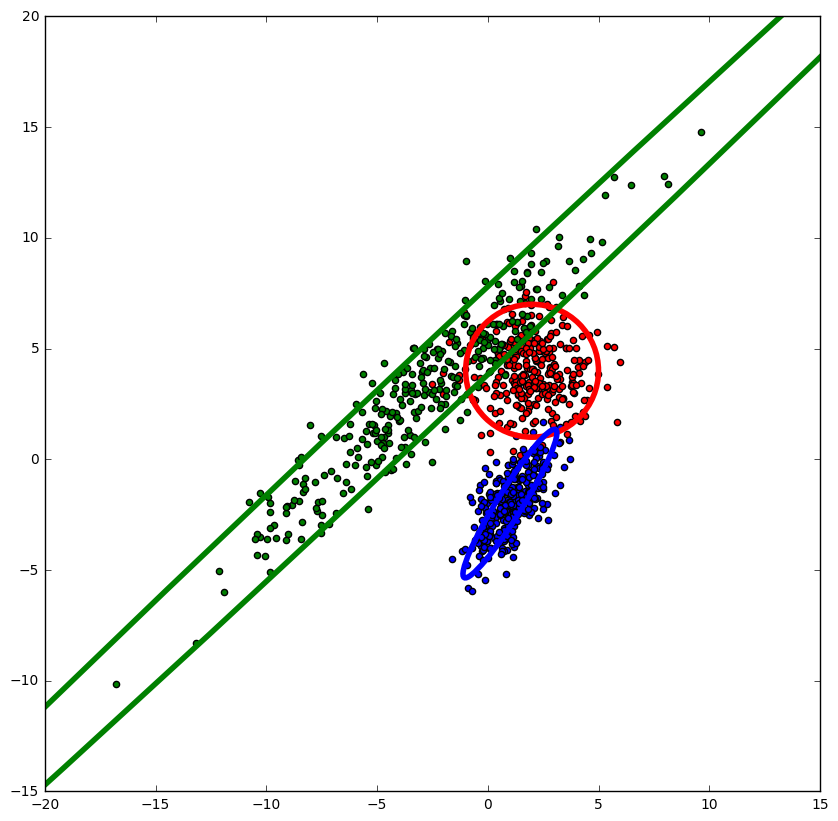

In [4]:
# Generate true means and covariances
means=[]
transforms=[]
covariances=[]
precisions=[]

mean=np.array([2.,4.])
transform=np.array([[1.,1.],[1.,-1.]])
covariance=np.dot(transform.T, transform)
precision=np.linalg.inv(covariance)

means.append(mean)
transforms.append(transform)
covariances.append(covariance)
precisions.append(precision)
                  
mean=np.array([-3.,3.])                  
transform = np.array([[1.414, 0.],[4., 4.]])
covariance=np.dot(transform.T, transform)
precision=np.linalg.inv(covariance)

means.append(mean)
transforms.append(transform)
covariances.append(covariance)
precisions.append(precision)

mean=np.array([1.,-2.])
transform=np.array([[1.,1.],[0., 1]])
covariance=np.dot(transform.T, transform)
precision=np.linalg.inv(covariance)

means.append(mean)
transforms.append(transform)
covariances.append(covariance)
precisions.append(precision)

# Generate data
datas=[]
full_data=np.zeros((0,2))
for mean,transform in zip(means,transforms):
    data=np.random.randn(300,2).dot(transform)+mean
    datas.append(data)
    full_data=np.concatenate((full_data, data))
    
# Plot and visualise data using defined function "Plot_scatter"
fig=plt.figure(figsize=(10,10))
ax=plt.gca()
ax.axis('equal')
plot_scatter(datas, ax)
plot_ellipses_gmm(means, covariances, ax)
plt.show()    
                

In [5]:
# Initialise parameter estimates

num_clusters=len(means)


means_est=[]
covs_est=[]
for i in range(num_clusters):
    means_est.append(np.random.rand(2)*4)
    covs_est.append(np.eye(2))


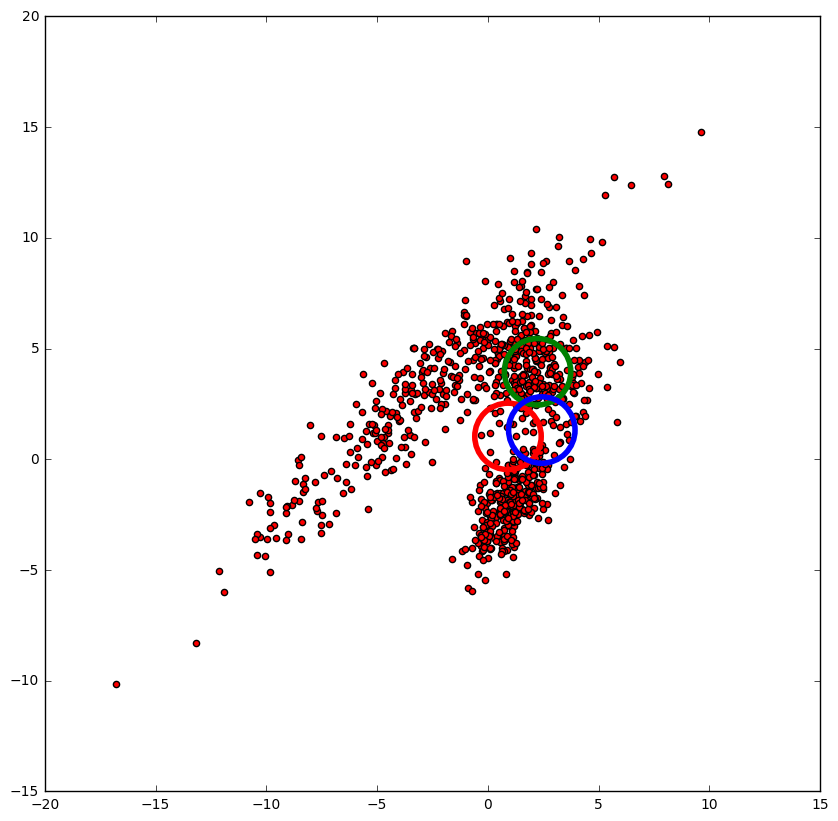

In [6]:
#visualise initial parameters:
fig=plt.figure(figsize=(10,10))
ax=plt.gca()
ax.axis('equal')
plot_scatter([full_data], ax)
plot_ellipses_gmm(means_est, covs_est, ax)
plt.show()


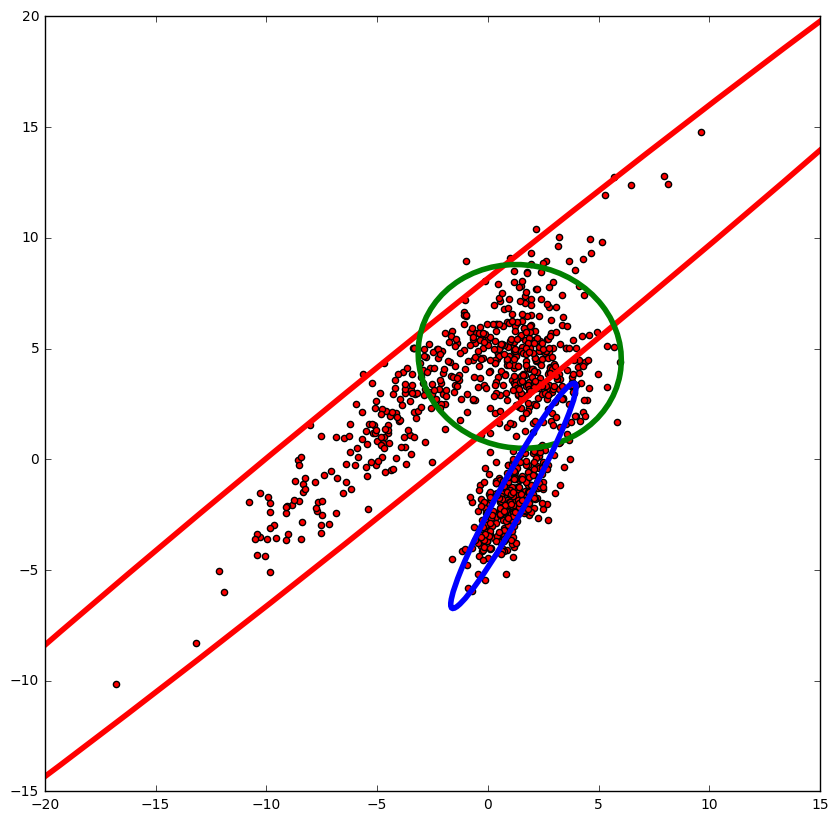

In [14]:
# One EM step
num_data_points=full_data.shape[0]
memberships=np.zeros((num_data_points,num_clusters))

# E step
for i in range(num_data_points):
    for j in range(num_clusters):
        
        a = np.dot(np.linalg.inv(covs_est[j]),full_data[i,:]-means_est[j])
        a = np.dot(a, full_data[i,:]-means_est[j])
        a = np.exp(-0.5*a)
        memberships[i,j] = a/np.sqrt(np.linalg.det(covs_est[j])*2*np.pi)

memberships /= memberships.sum(axis=1)[:,None] # normalise each row

means_est=[]
covs_est=[]
for j in range(num_clusters):
    means_est.append(np.zeros(2))
    covs_est.append(np.zeros((2,2)))
                    
for j in range(num_clusters):
    for i in range(num_data_points):
        means_est[j] += memberships[i,j]*full_data[i,:]
    means_est[j]/=memberships.sum(axis=0)[j]

                    
for j in range(num_clusters):
    for i in range(num_data_points):
        covs_est[j] += memberships[i,j]*np.outer(full_data[i,:]-means_est[j], full_data[i,:]-means_est[j])
    covs_est[j]/=memberships.sum(axis=0)[j]
    
    
#Visualise parameters at the end of one EM step
fig=plt.figure(figsize=(10,10))
ax=plt.gca()
ax.axis('equal')
plot_scatter([full_data], ax)
plot_ellipses_gmm(means_est, covs_est, ax)
plt.show()

        